In [1]:
%matplotlib notebook 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
apple = "Resources/Apple_Data.csv"
google = "Resources/Google_Data.csv"
apple_cat = "Resources/Apple_cat.csv"
google_cat = "Resources/Google_cat.csv"
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [3]:
apple = pd.read_csv(apple, index_col=0)
google = pd.read_csv(google, index_col=0)
google_cat = pd.read_csv(google_cat, index_col=0)
apple_cat = pd.read_csv(apple_cat, index_col=0)

In [4]:
google.head()

App      Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  Art & Design     4.1   
1                                Coloring book moana  Art & Design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  Art & Design     4.7   
3                              Sketch - Draw & Paint  Art & Design     4.5   
4              Pixel Draw - Number Art Coloring Book  Art & Design     4.3   

   Reviews Size (M)  Installs  Type  Price                     Genres  \
0      159       19     10000  Free    0.0               Art & Design   
1      967       14    500000  Free    0.0  Art & Design;Pretend Play   
2    87510      8.7   5000000  Free    0.0               Art & Design   
3   215644       25  50000000  Free    0.0               Art & Design   
4      967      2.8    100000  Free    0.0    Art & Design;Creativity   

     New Genres Price Category  
0  Productivity           Free  
1  Productivity           Free  
2  Productivity           Free  
3  Productivity           Free  
4  Productivity           Free

In [5]:
apple.head()

App  Price  Rating Count  \
0                                    PAC-MAN Premium   3.99         21292   
1                          Evernote - stay organized   0.00        161065   
2    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00        188583   
3  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00        262241   
4                                              Bible   0.00        985920   

   Rating        Genres  Size (M)  Type    New Genres Price Category  
0     4.0         Games     100.8  Paid         Games           $3-4  
1     4.0  Productivity     158.6  Free  Productivity           Free  
2     3.5       Weather     100.5  Free     Utilities           Free  
3     4.0      Shopping     128.5  Free         Other           Free  
4     4.5     Reference      92.8  Free     Education           Free

# By Rating 

<IPython.core.display.Javascript object>


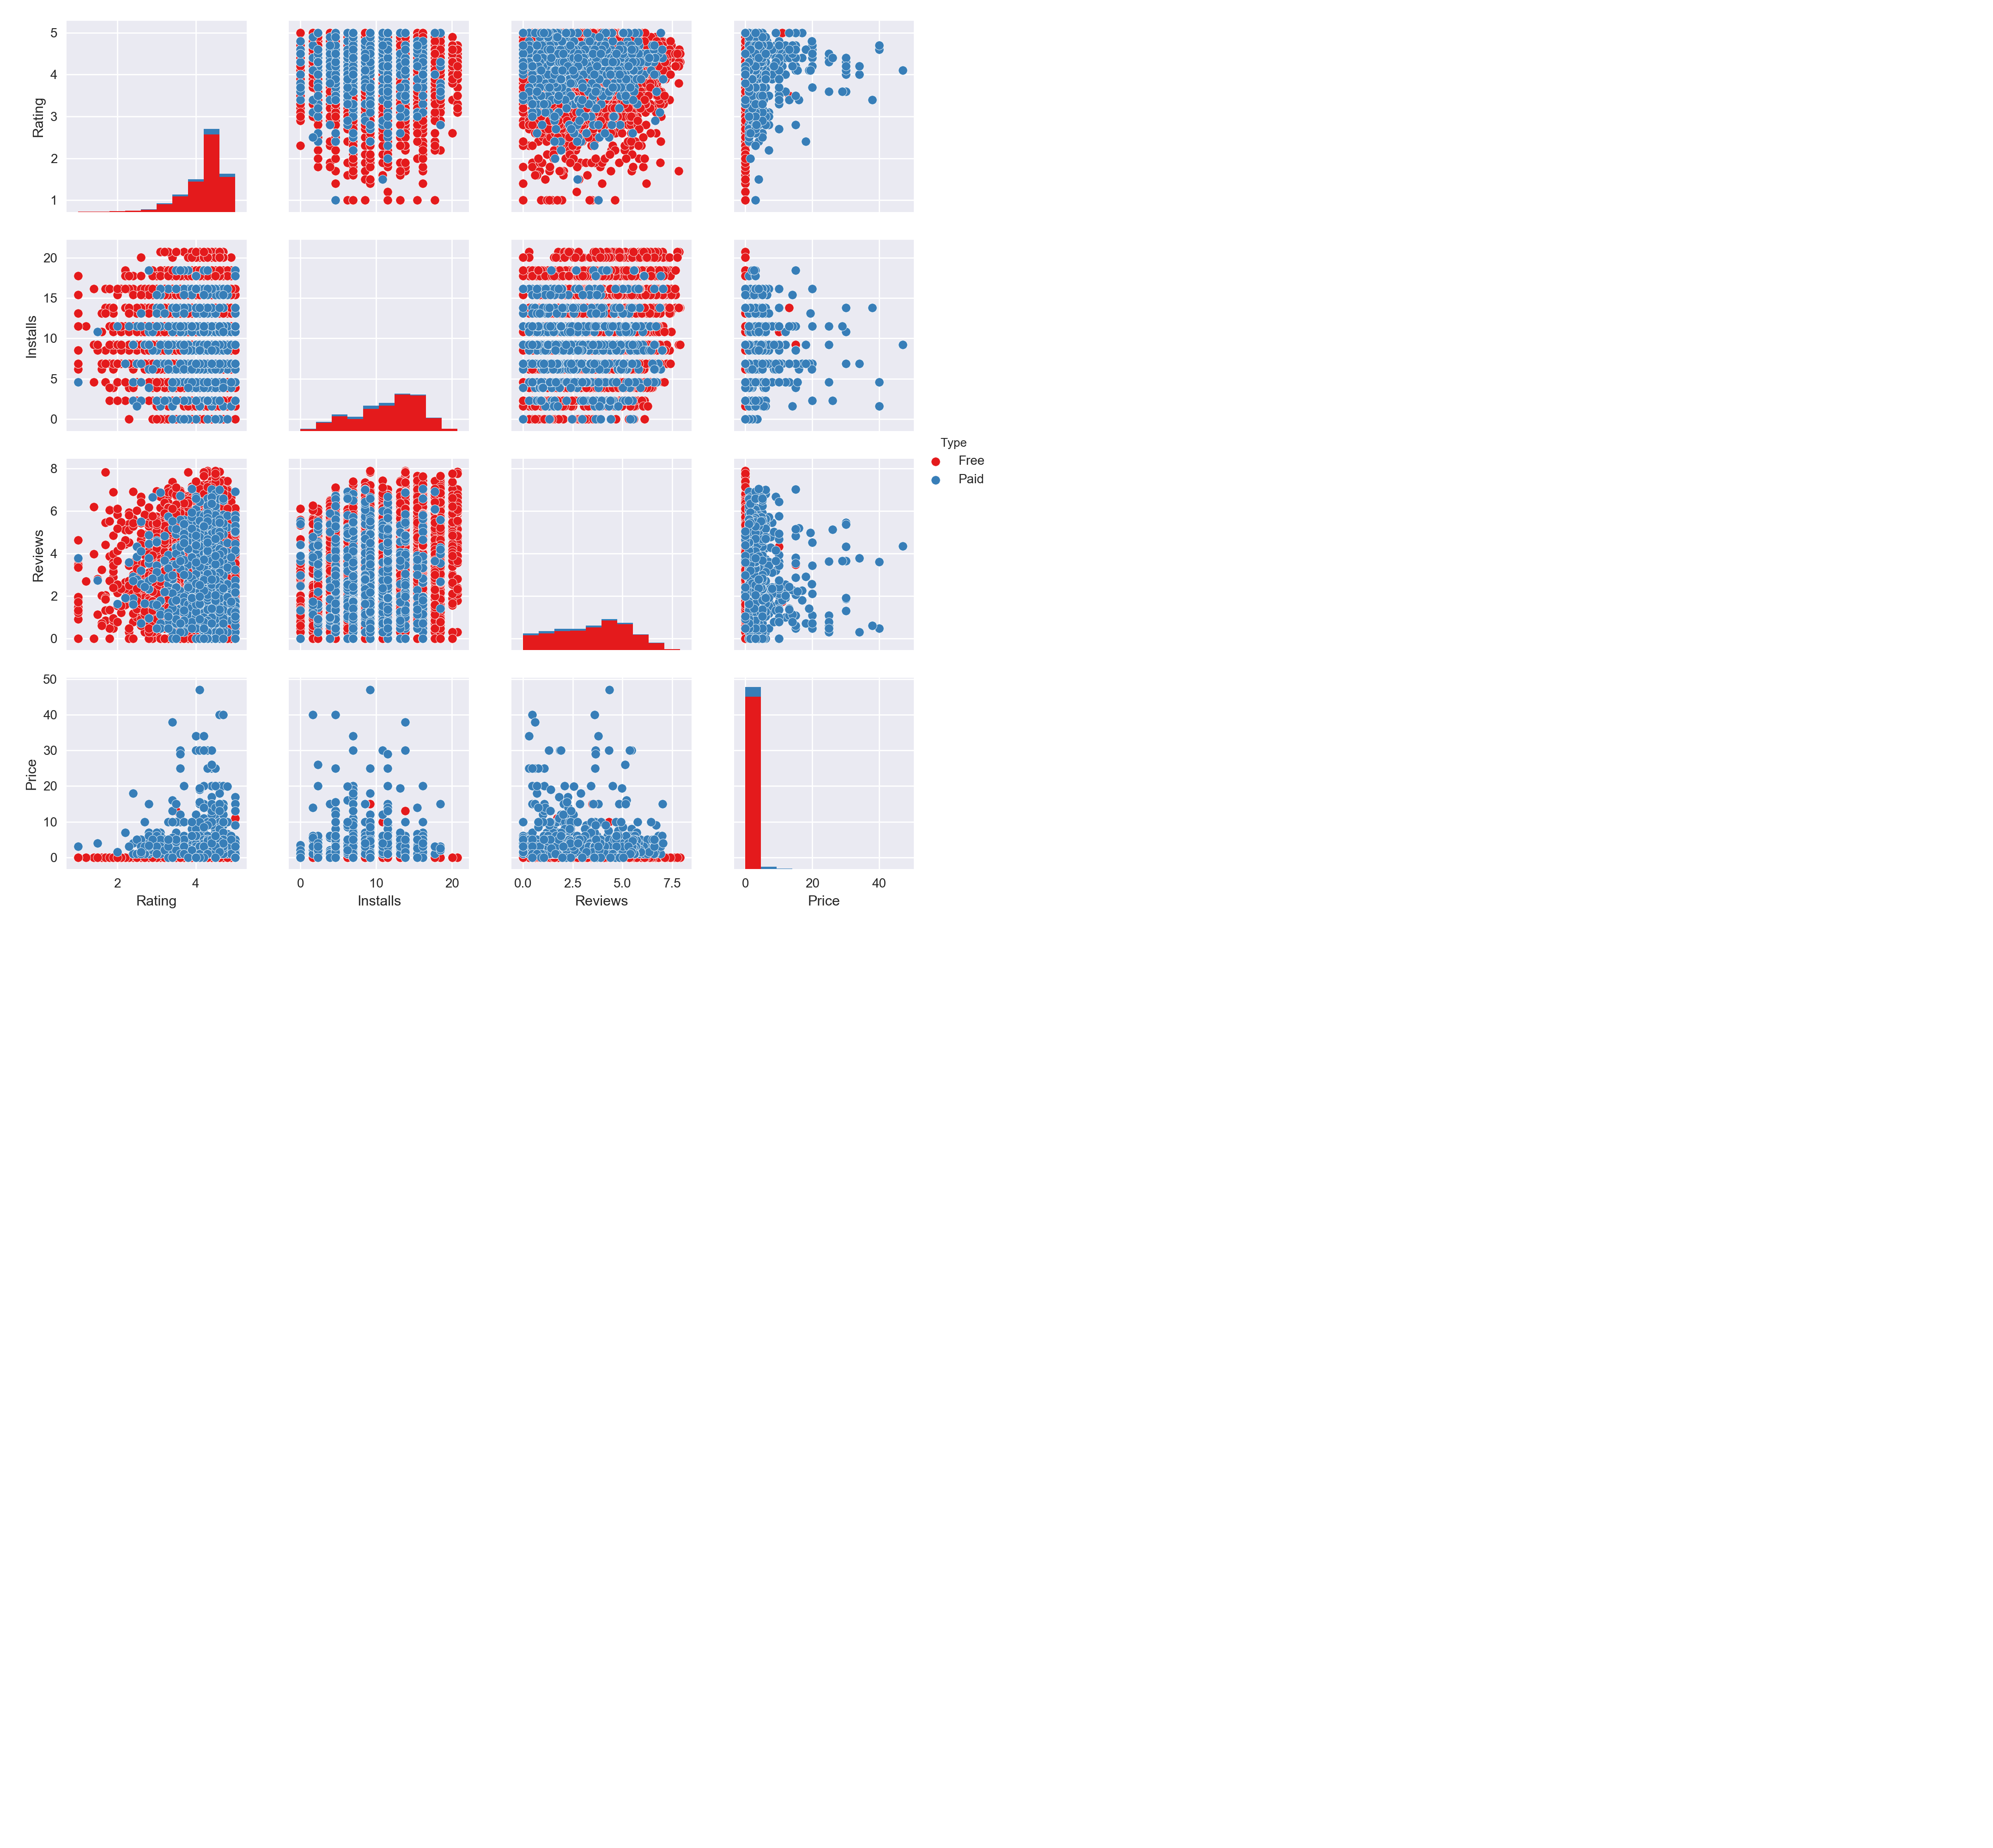

In [6]:
x = google['Rating'].dropna()
z = google['Installs'][google.Installs!=0].dropna()
p = google['Reviews'][google.Reviews!=0].dropna()
t = google['Type'].dropna()
price = google['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set1")

In [7]:
plt.close()

In [8]:
apple['Rating Count'] = apple['Rating Count'].apply(lambda x: float(x))
apple['Rating'] = apple['Rating'].apply(lambda x: float(x))
apple['Price'] = apple['Price'].apply(lambda x: float(x))

<IPython.core.display.Javascript object>


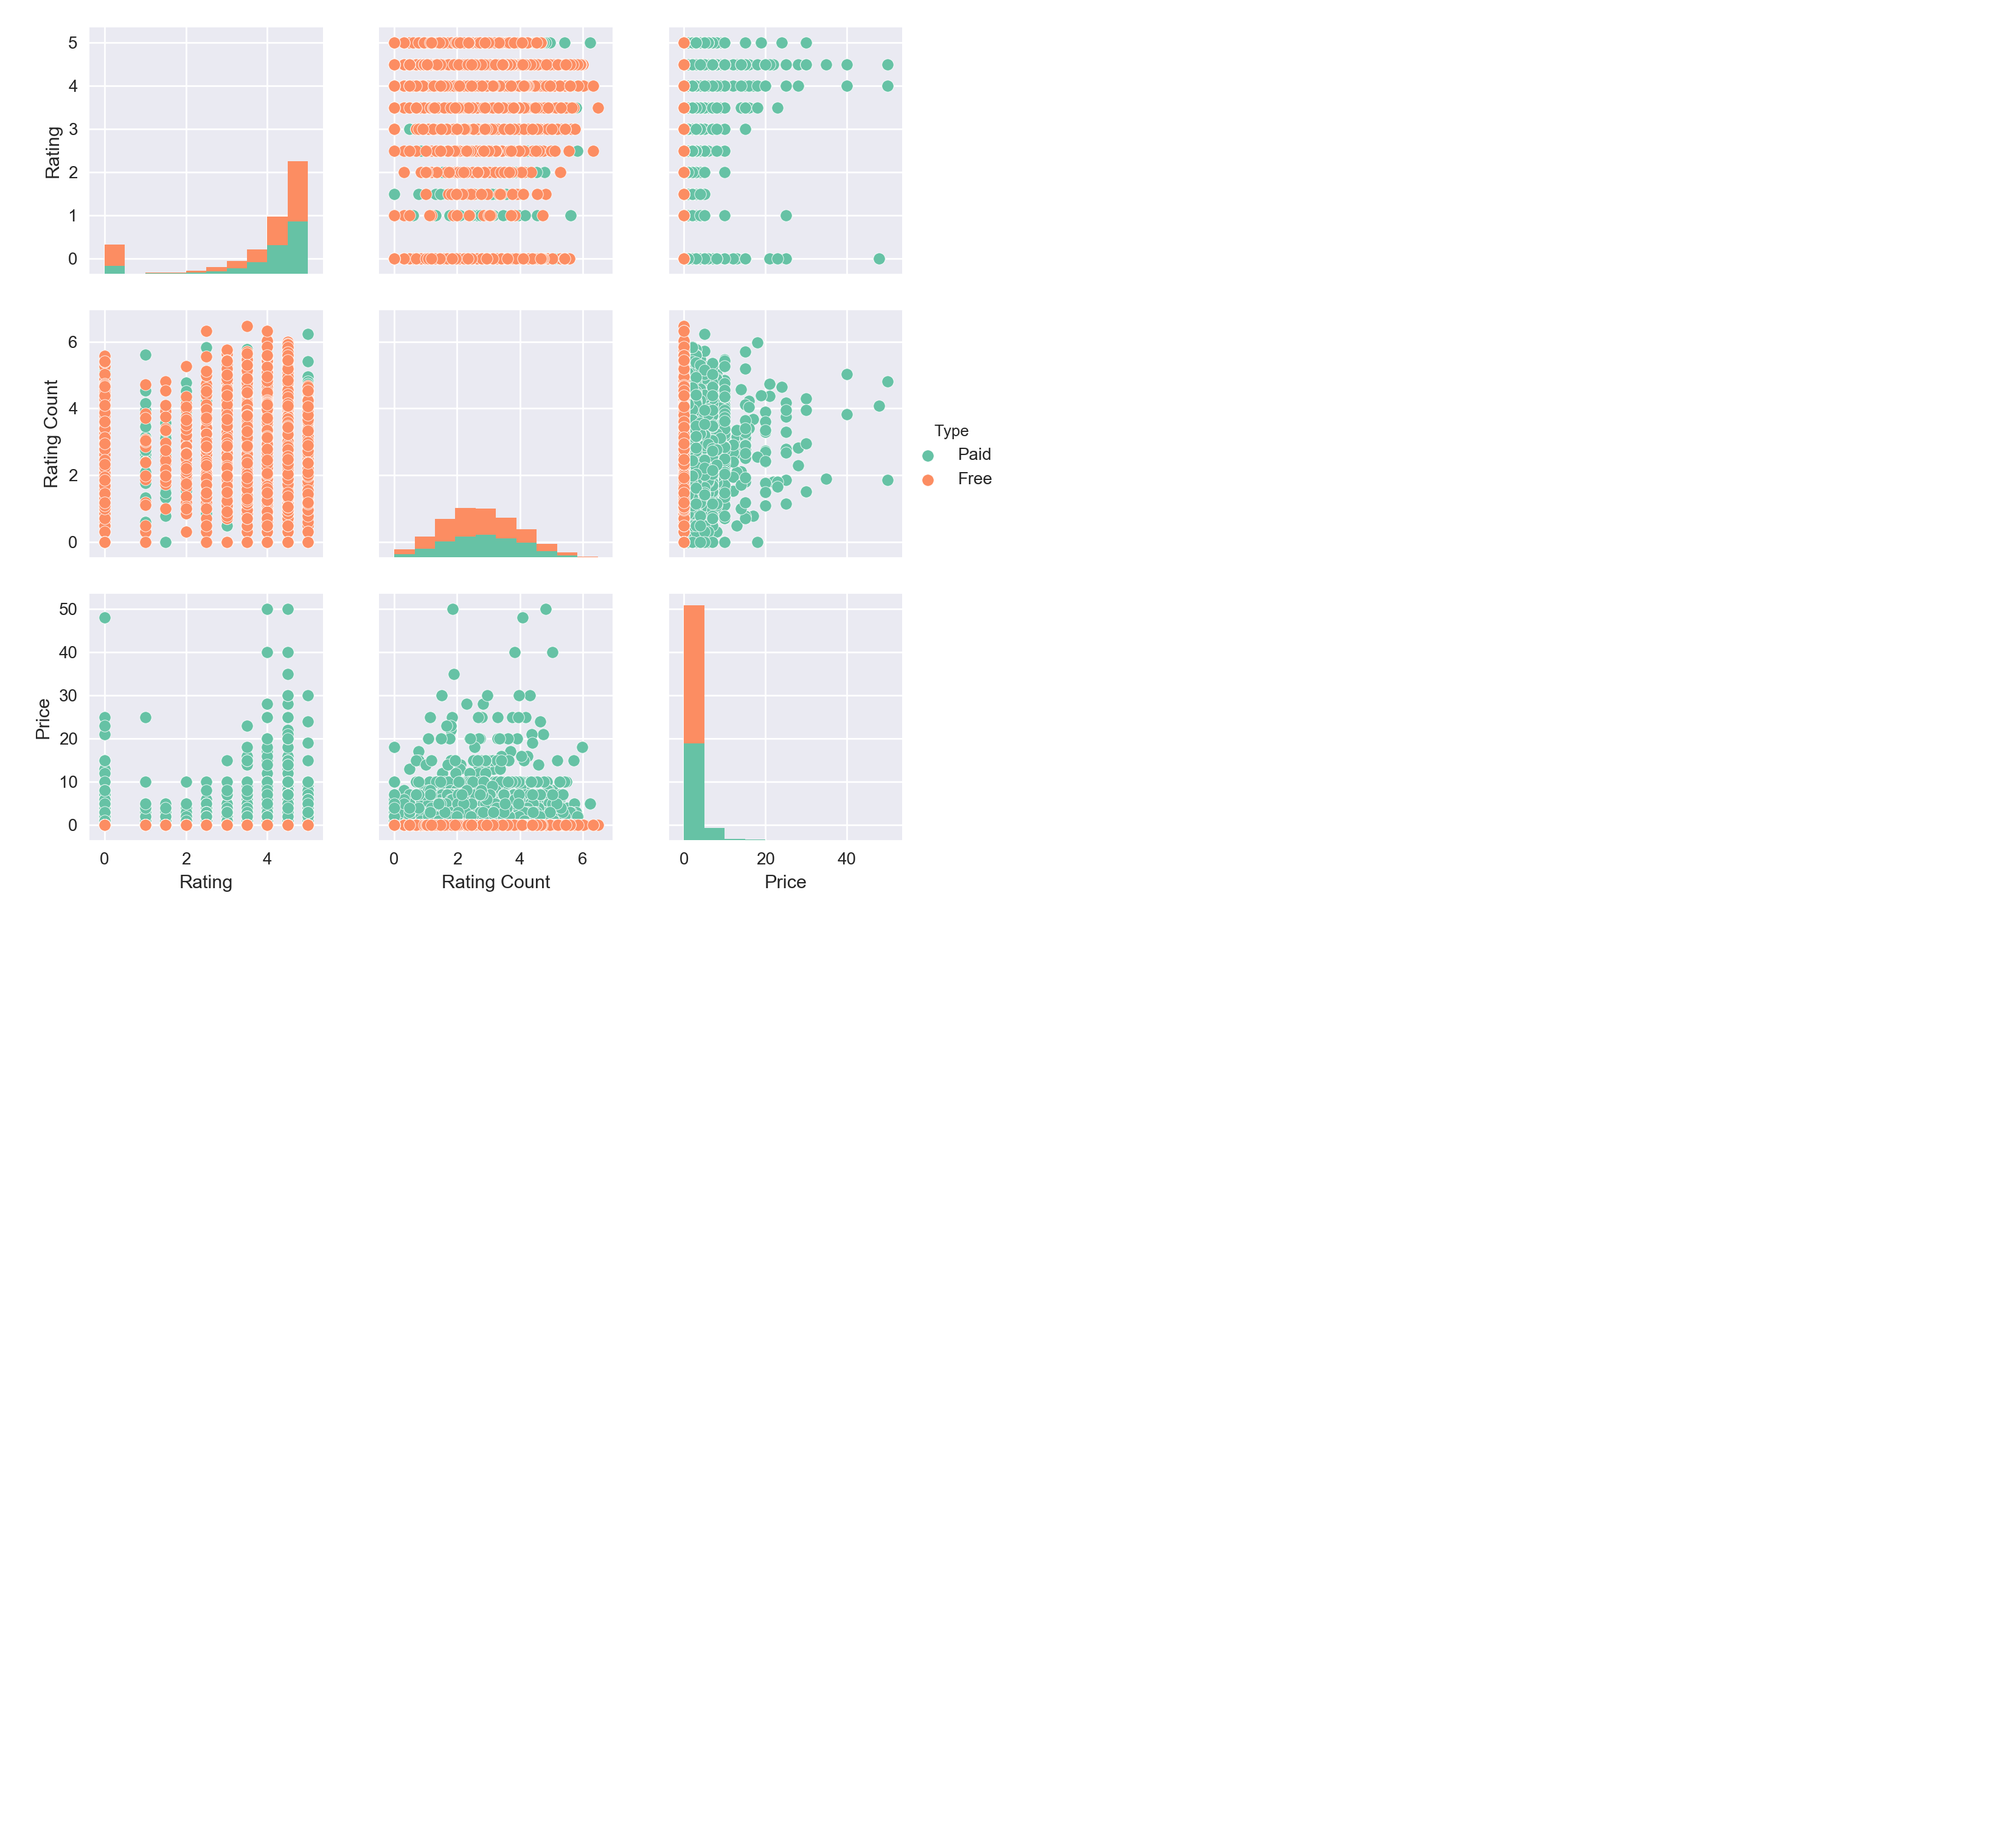

In [9]:
x = apple['Rating'].dropna()
p = apple['Rating Count'][apple["Rating Count"] !=0].dropna()
t = apple['Type'].dropna()
price = apple['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, np.log10(p), t, price)), 
                        columns=['Rating',  'Rating Count', 'Type', 'Price']), hue = 'Type', palette="Set2")


In [10]:
plt.close()

In [11]:
data = [go.Histogram(
        x = google.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(google['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.192191678254365


In [12]:
a_data = [go.Histogram(
        x = apple.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(apple['Rating']))
plotly.offline.iplot(a_data, filename='overall_rating_distribution')

Average app rating =  3.5263560500695412


In [13]:
# Checking basic statistics: the value count, mean, standard deviation, minimum, maximum, and 25th, 50th, and 75th quantiles for the data in the Rating column.
google["Rating"].describe()

count    9349.000000
mean        4.192192
std         0.515277
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [14]:
apple["Rating"].describe()

count    7190.000000
mean        3.526356
std         1.518525
min         0.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<IPython.core.display.Javascript object>


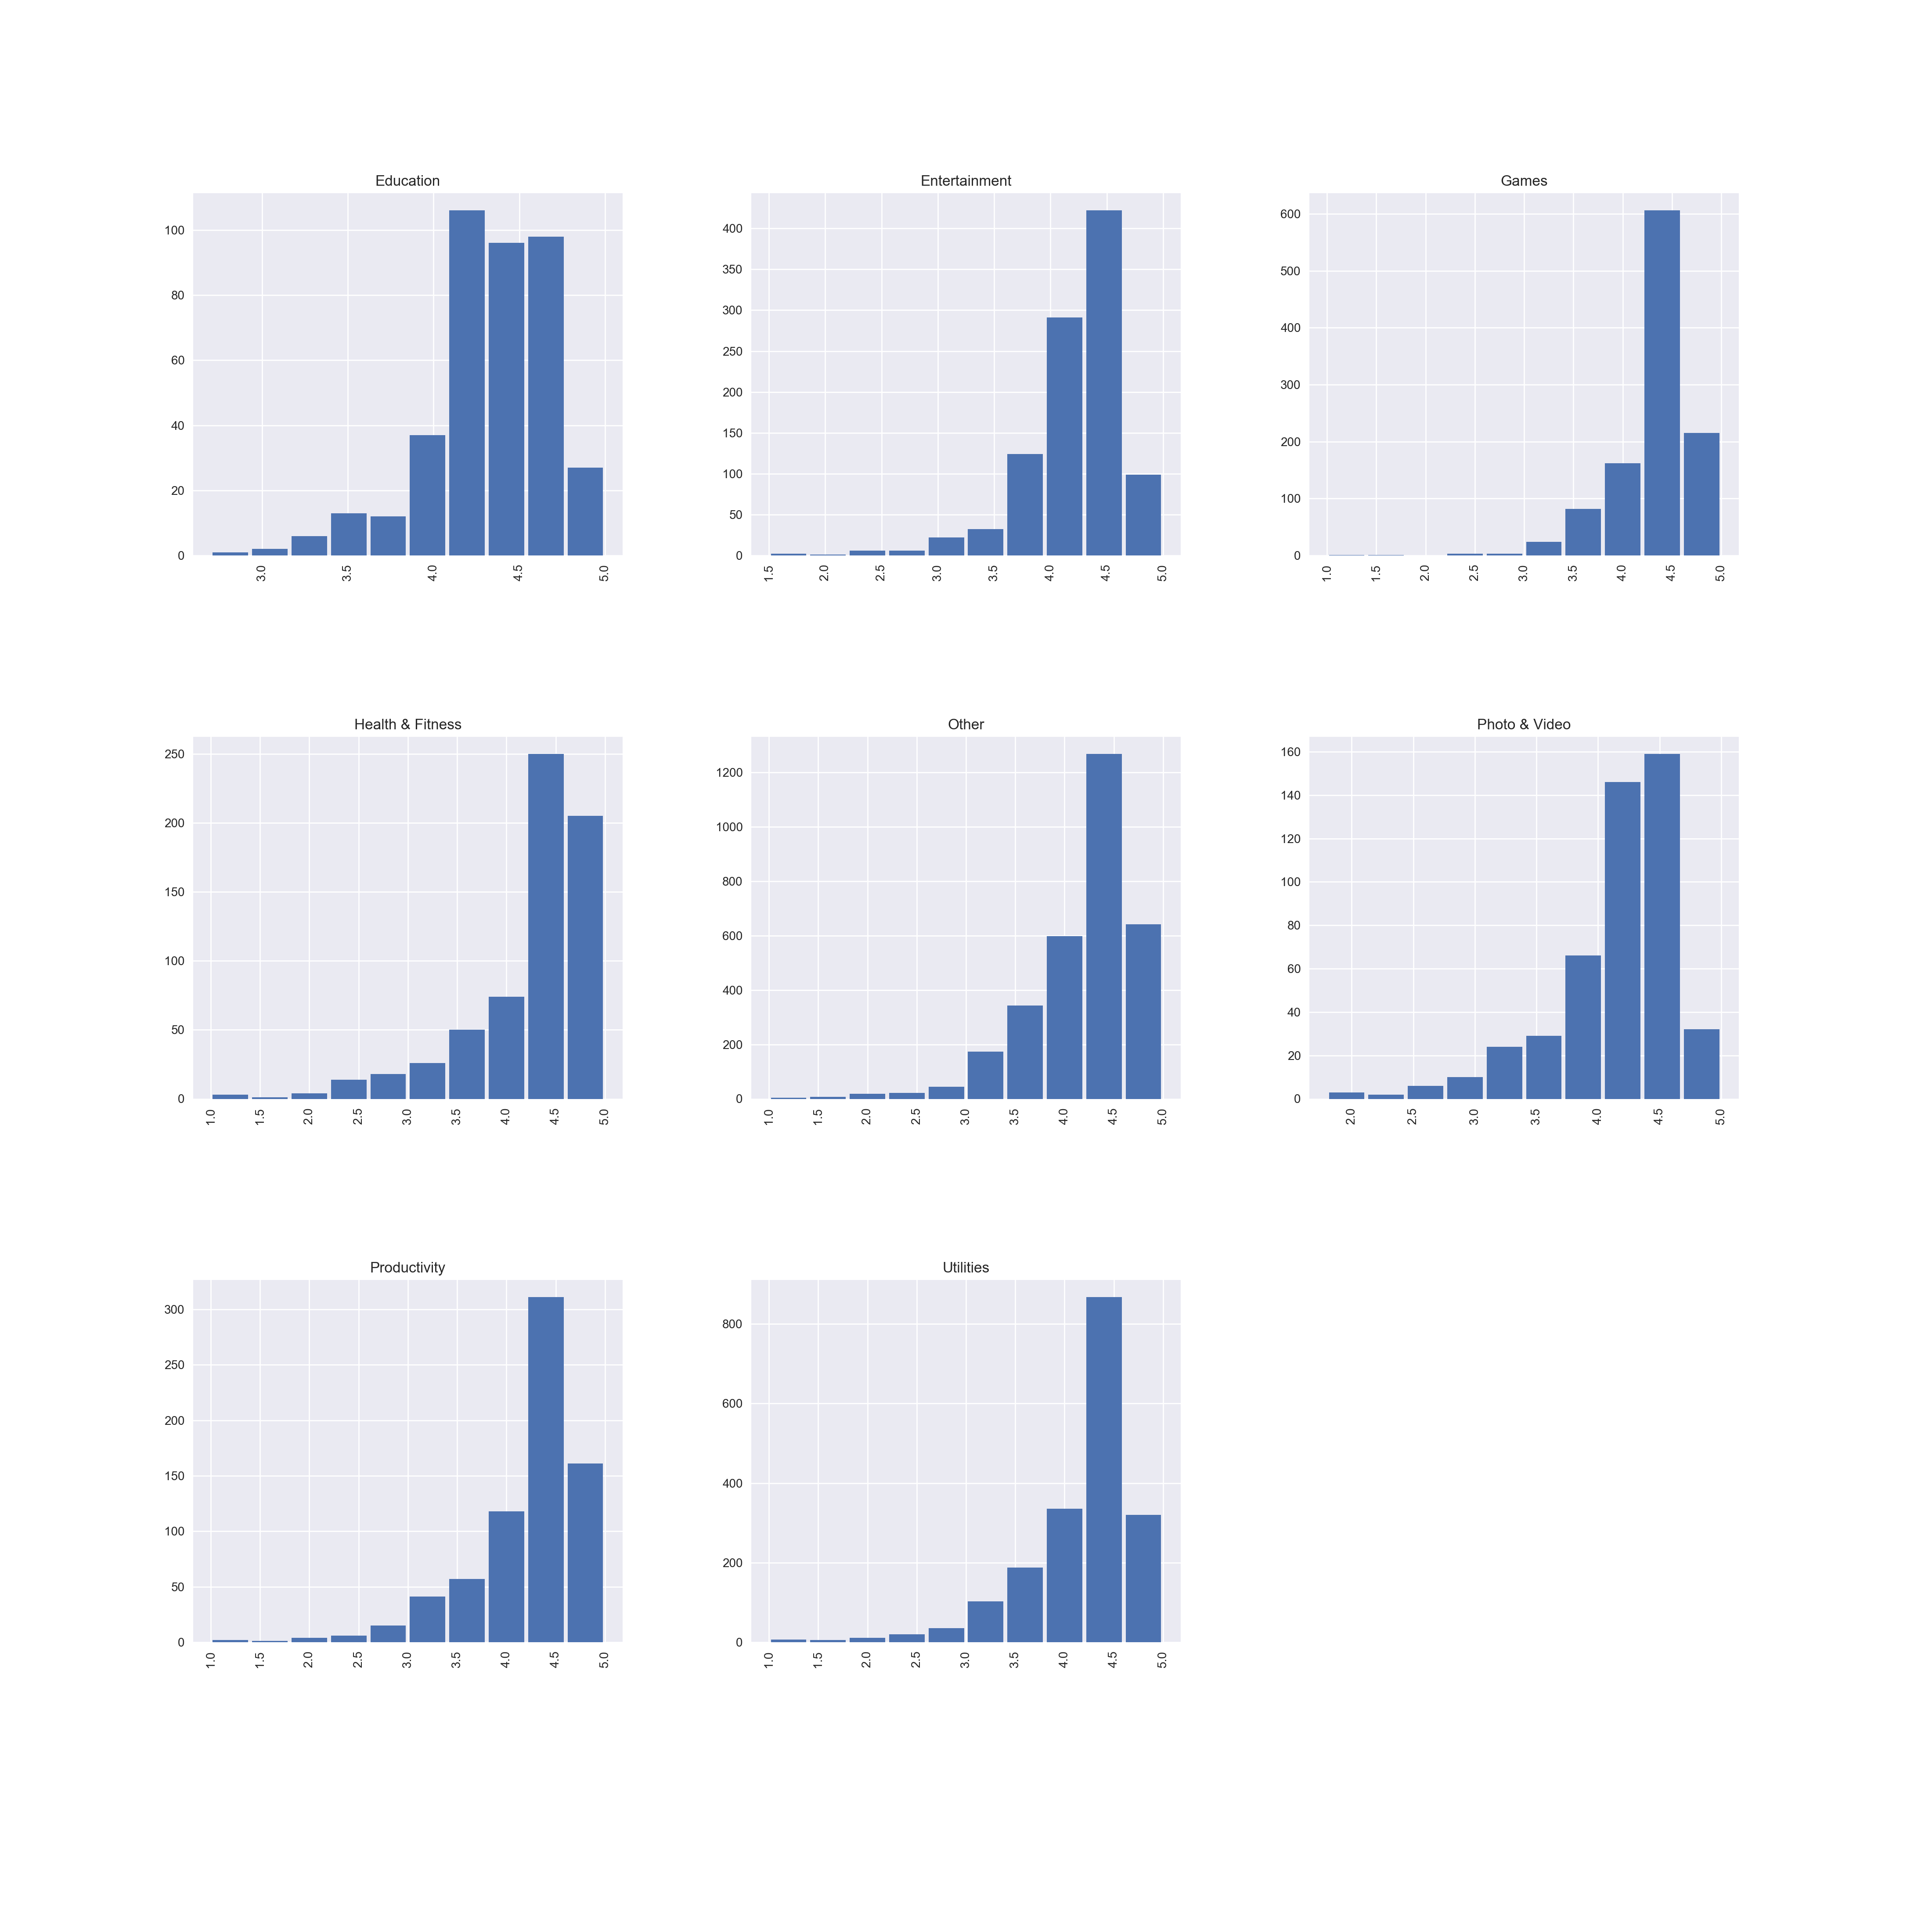

In [15]:
from scipy import stats as stats

# Using GroupBy in order to separate the data into fields according to "New Genres" and resetting the index

groups = google.groupby('New Genres').filter(lambda x: len(x) > 286).reset_index()
graphs = groups['Rating'].hist(by=groups['New Genres'],  figsize=(22,22), rwidth = 0.9)

plt.savefig("fig3.png")

In [16]:
plt.close()

<IPython.core.display.Javascript object>


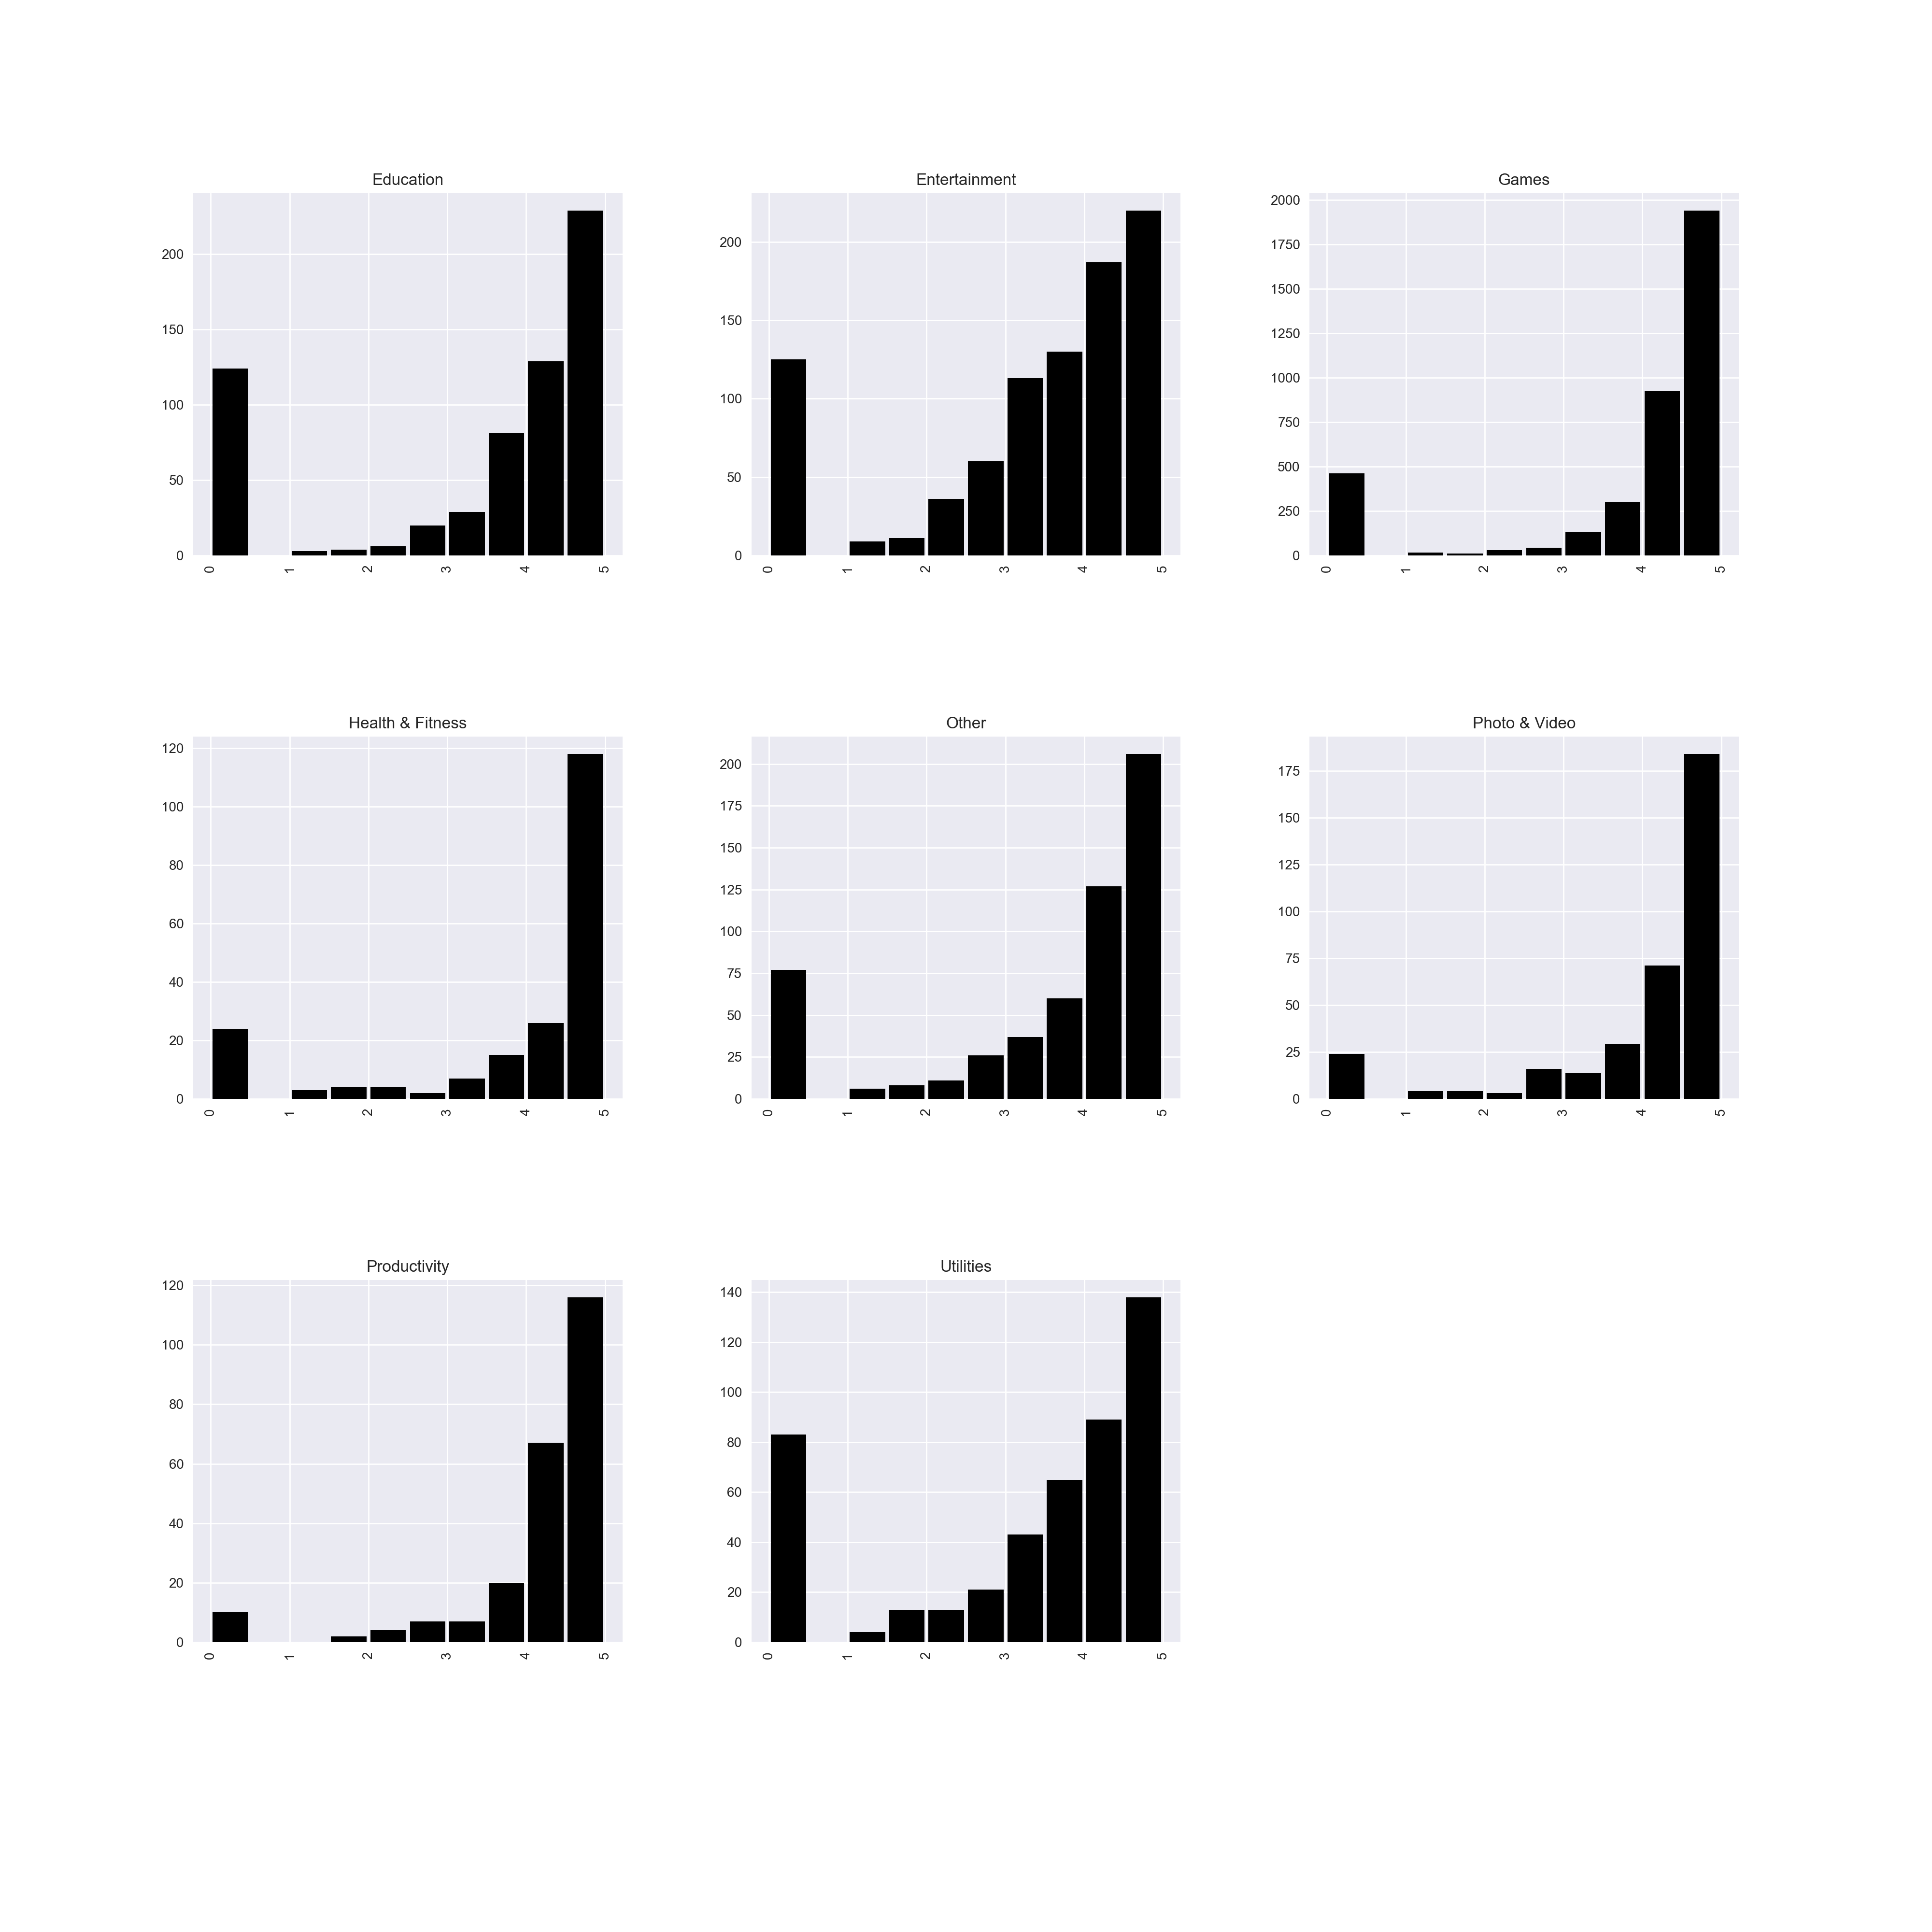

In [17]:
groups = apple.groupby('New Genres').filter(lambda x: len(x) > 100).reset_index()
graphs = groups['Rating'].hist(by=groups['New Genres'],  figsize=(20,20), rwidth = 0.9, color = 'black')

plt.savefig("fig4.png")

In [18]:
plt.close()

# By Categories

<IPython.core.display.Javascript object>


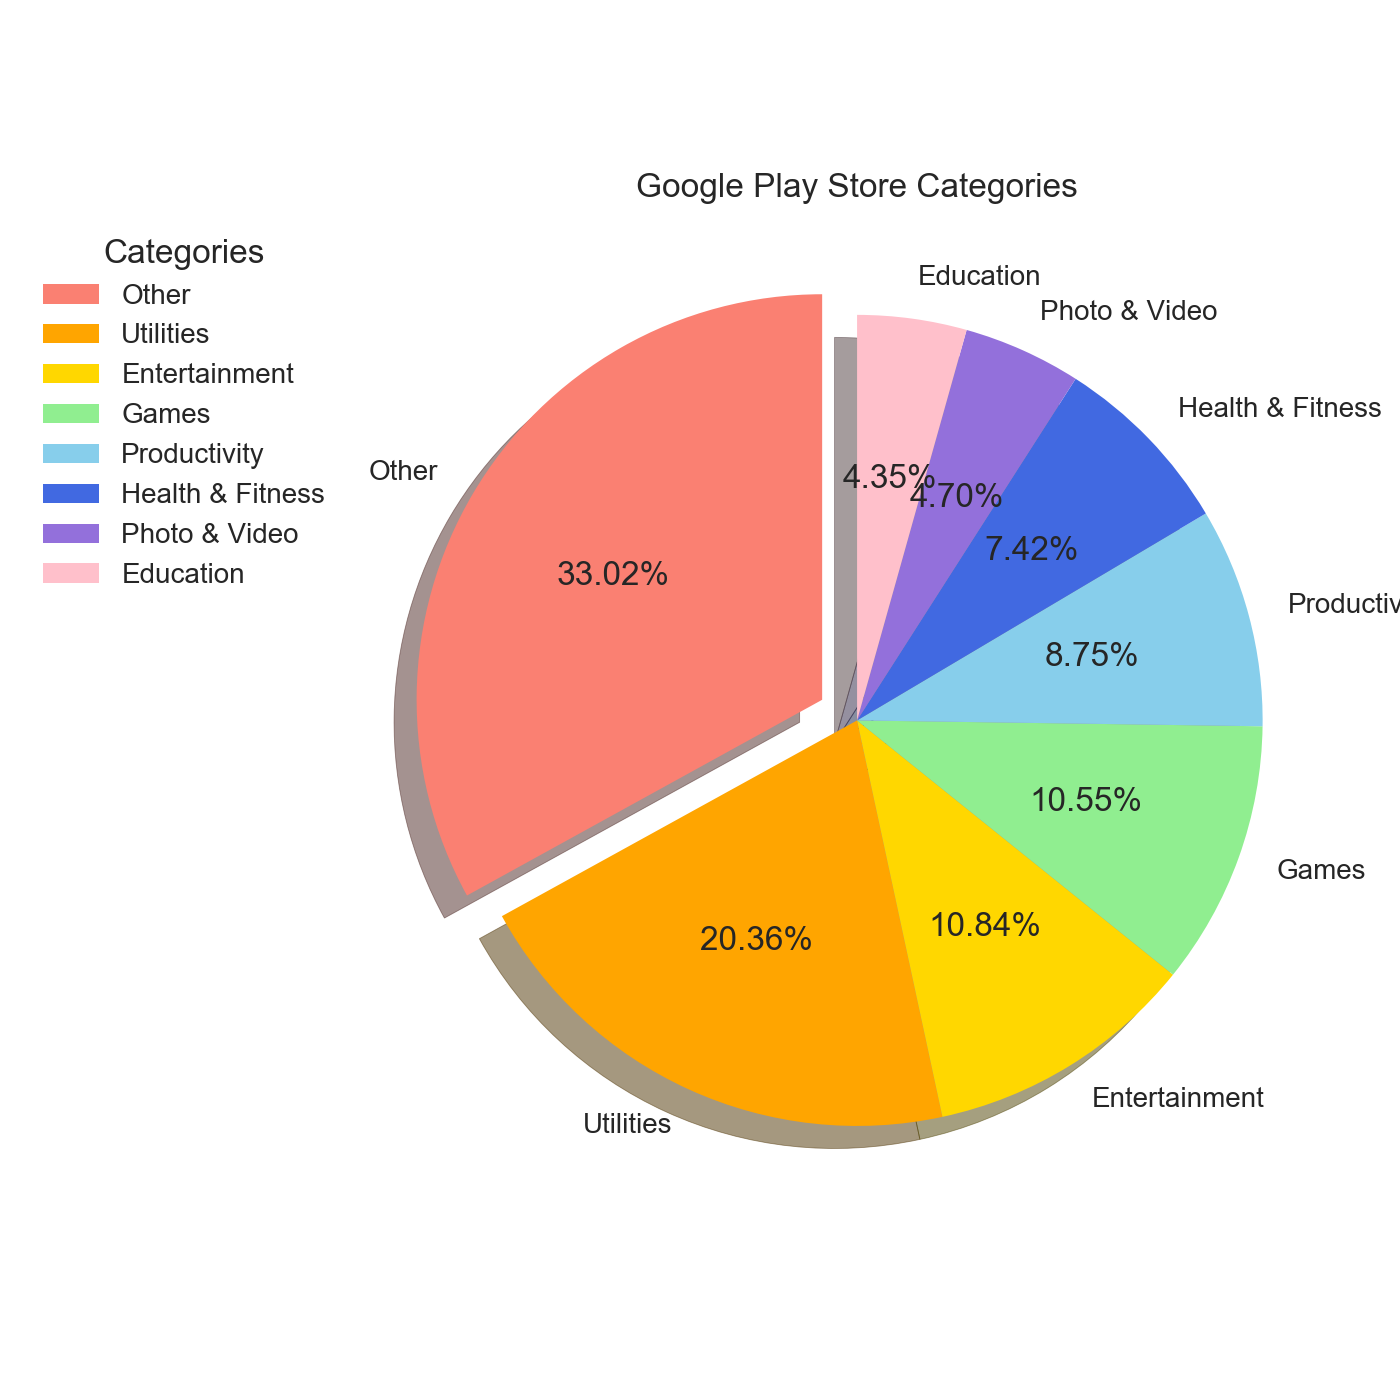

In [56]:
labels = google_cat.index
colors = ["salmon","orange","gold","lightgreen","skyblue","royalblue","mediumpurple","pink"]
explodes=[0.1,0,0,0,0,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(google_cat["App"],colors=colors,labels=labels,autopct="%.2f%%",startangle=90,explode=explodes,shadow=True)
plt.axes().set_aspect("equal")
plt.title("Google Play Store Categories")
plt.legend(title="Categories",loc="best",bbox_to_anchor=[0,1,0,0])
plt.tight_layout()
plt.savefig("googlecategory.png",bbox_inches="tight")

In [20]:
plt.close()

<IPython.core.display.Javascript object>


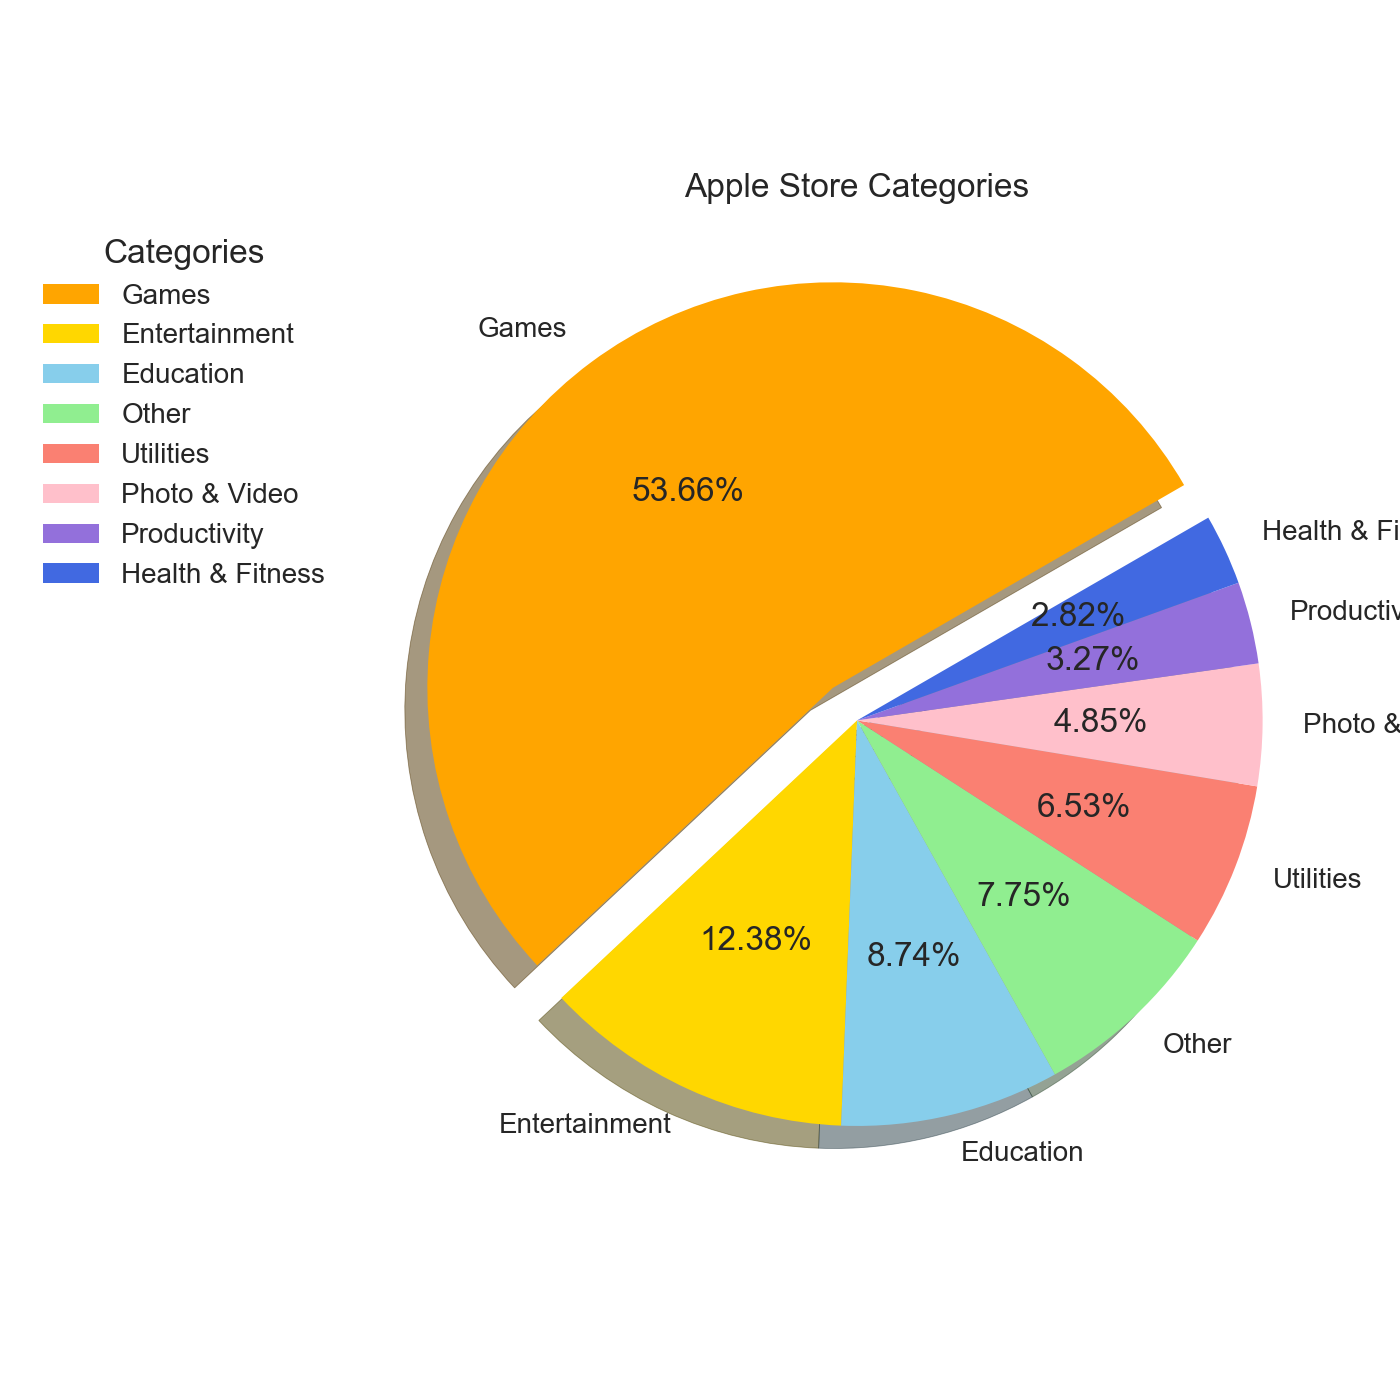

In [76]:
plt.figure(figsize=(7,7))
labels = apple_cat.index
colors = ["orange","gold","skyblue","lightgreen","salmon","pink","mediumpurple","royalblue"]
explodes=[0.1,0,0,0,0,0,0,0]
apple_pie=plt.pie(apple_cat["App"],colors=colors,labels=labels,autopct="%.2f%%",
                  startangle=30,explode=explodes,shadow=True)
plt.axes().set_aspect("equal")
plt.title("Apple Store Categories")
plt.legend(title="Categories",loc="best",bbox_to_anchor=[0,1,0,0])
plt.tight_layout()
plt.savefig("applecat.png",bbox_inches="tight")

In [22]:
plt.close()

<IPython.core.display.Javascript object>


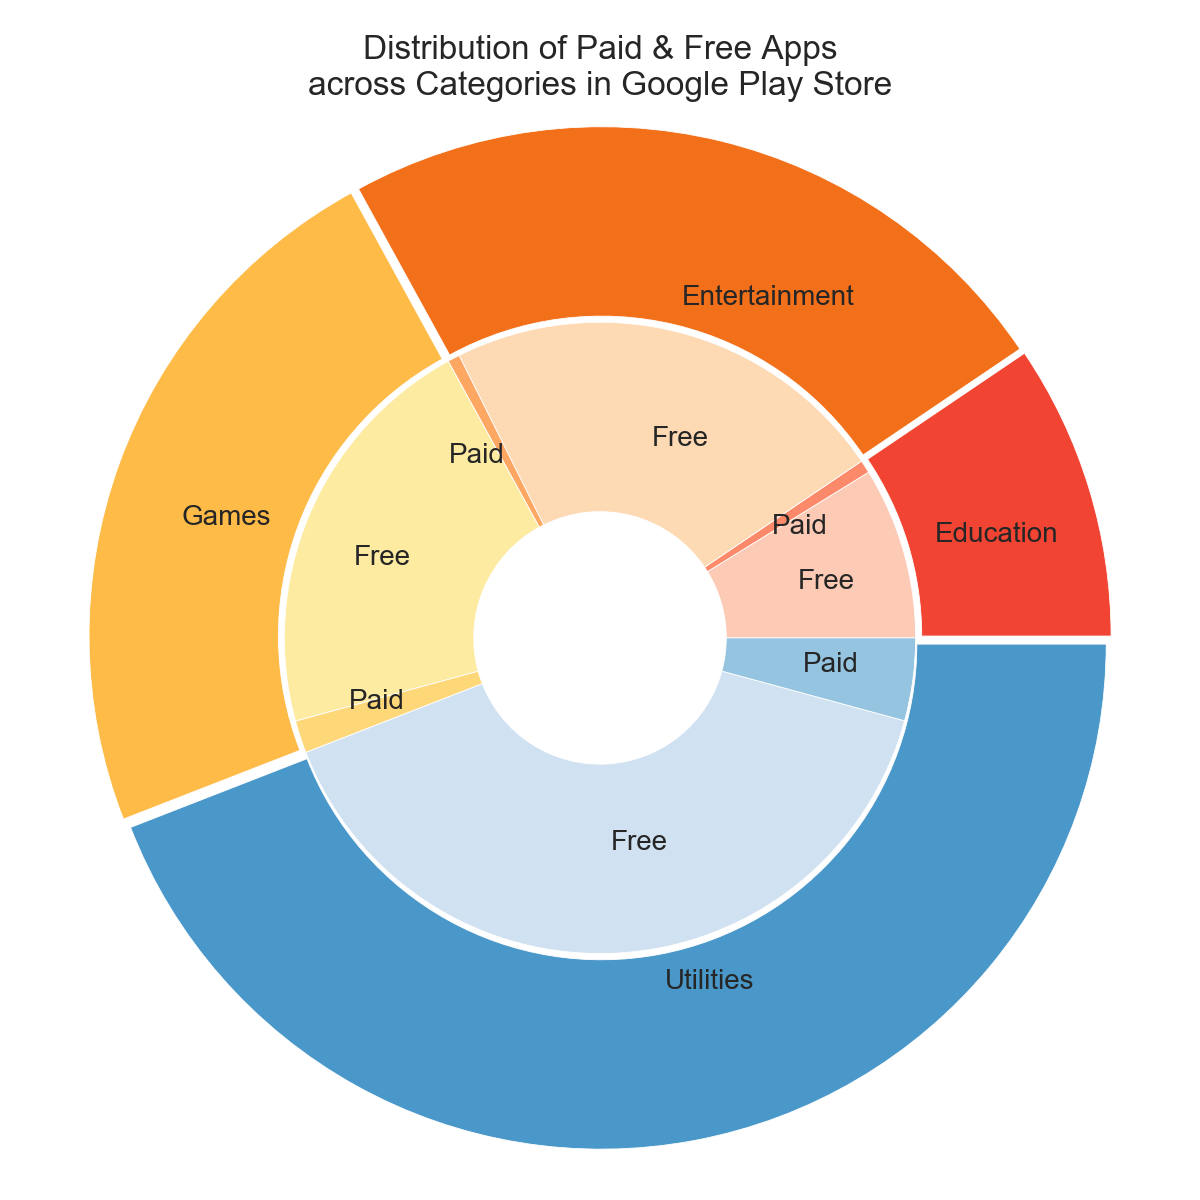

In [64]:
google_out = google.loc[(google["New Genres"]=="Games")|(google["New Genres"]=="Entertainment")|
                        (google["New Genres"]=="Education")|(google["New Genres"]=="Utilities")].groupby("New Genres").count()
google_in = google.loc[(google["New Genres"]=="Games")|(google["New Genres"]=="Entertainment")|
                        (google["New Genres"]=="Education")|(google["New Genres"]=="Utilities")].groupby(["New Genres","Type"]).count()
size = 0.45
plt.figure(figsize=(6,6))
labels = google_out.index
labels1 = google_in.index.get_level_values(1)

explode = [0.015,0.015,0.015,0.015]

a,b,c,d = [plt.cm.Reds,plt.cm.Oranges,plt.cm.YlOrBr,plt.cm.Blues]

plt.pie(google_out["App"], radius=1.2,labels=labels,colors=[a(0.6),b(0.6),c(0.4),d(0.6)],
        labeldistance= 0.68,wedgeprops=dict(width=size, edgecolor="w"),explode=explode)

plt.pie(google_in["App"], radius=1.2-size,labels=labels1,labeldistance= 0.65,colors=[a(0.2),a(0.4),b(0.2),b(0.4),c(0.2),c(0.3),d(0.2),d(0.4)],
        wedgeprops=dict(width=size, edgecolor="w"))

plt.axes().set_aspect("equal")
plt.title("Distribution of Paid & Free Apps"+"\n"+"across Categories in Google Play Store")
plt.tight_layout()
plt.savefig("googledistribution.png",bbox_inches="tight")

In [65]:
plt.close()

<IPython.core.display.Javascript object>


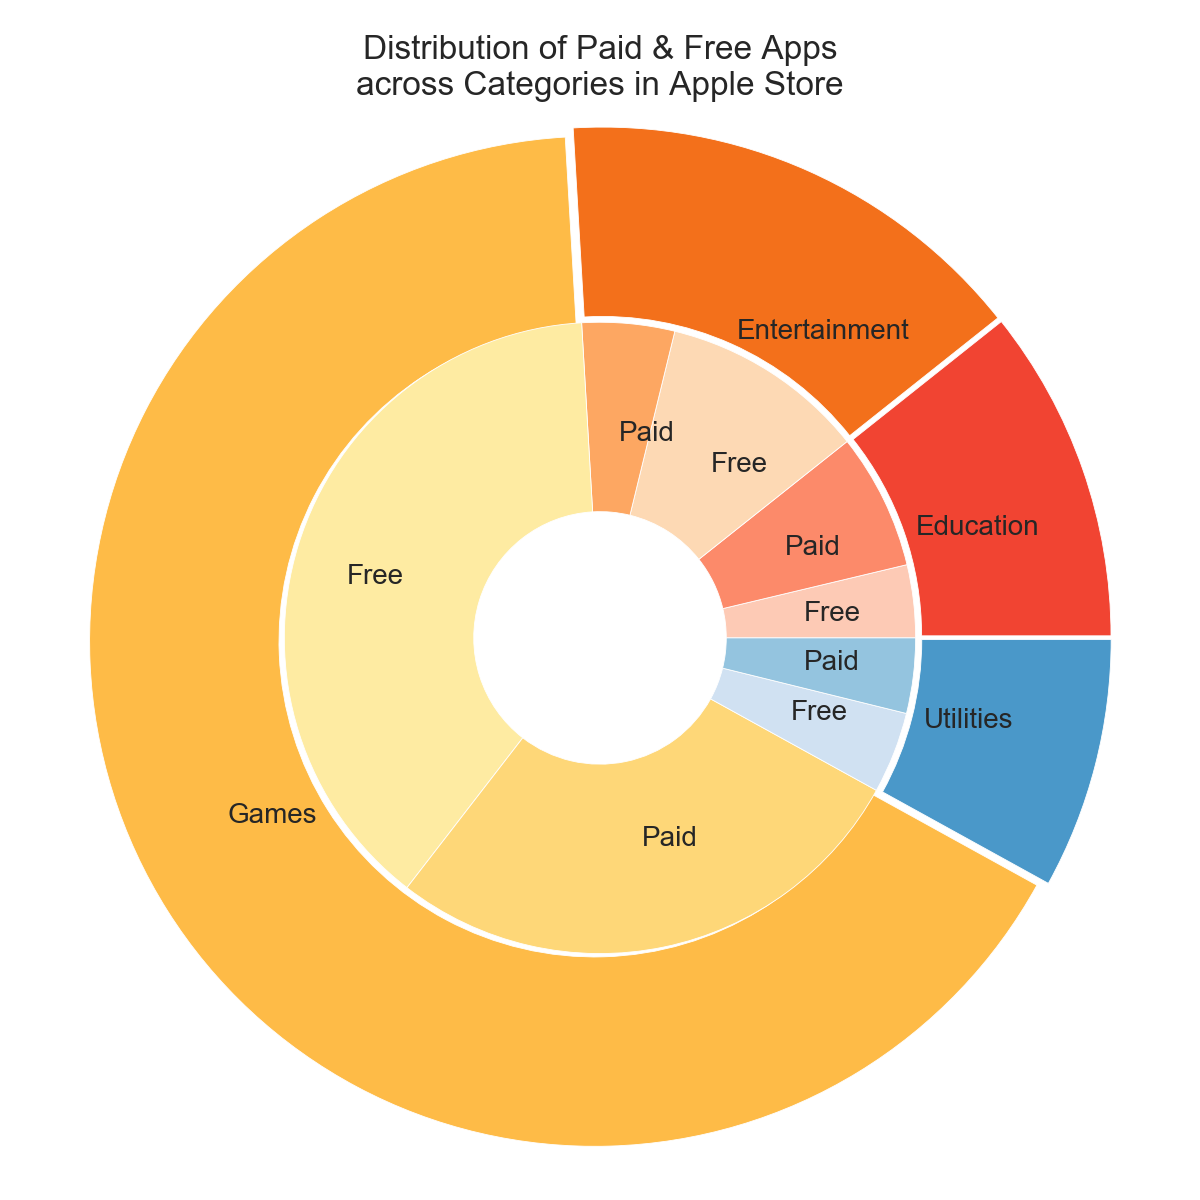

In [66]:
apple_out = apple.loc[(apple["New Genres"]=="Games")|(apple["New Genres"]=="Entertainment")|
                        (apple["New Genres"]=="Education")|(apple["New Genres"]=="Utilities")].groupby("New Genres").count()
apple_in = apple.loc[(apple["New Genres"]=="Games")|(apple["New Genres"]=="Entertainment")|
                        (apple["New Genres"]=="Education")|(apple["New Genres"]=="Utilities")].groupby(["New Genres","Type"]).count()
size = 0.45
plt.figure(figsize=(6,6))
labels = apple_out.index
labels1 = apple_in.index.get_level_values(1)

explode = [0.015,0.015,0.015,0.015]

a,b,c,d = [plt.cm.Reds,plt.cm.Oranges,plt.cm.YlOrBr,plt.cm.Blues]

plt.pie(apple_out["App"], radius=1.2,labels=labels,colors=[a(0.6),b(0.6),c(0.4),d(0.6)],
        labeldistance= 0.65,wedgeprops=dict(width=size, edgecolor="w"),explode=explode)

plt.pie(apple_in["App"], radius=1.2-size,labels=labels1,labeldistance= 0.65,colors=[a(0.2),a(0.4),b(0.2),b(0.4),c(0.2),c(0.3),d(0.2),d(0.4)],
        wedgeprops=dict(width=size, edgecolor="w"))

plt.axes().set_aspect("equal")
plt.title("Distribution of Paid & Free Apps"+"\n"+"across Categories in Apple Store")
plt.tight_layout()
plt.savefig("appledis.png",bbox_inches="tight")

In [67]:
plt.close()

# By Price

In [27]:
apple = apple[apple["Price Category"] != "100+"]
google = google[google["Price Category"] != "100+"]
apple = apple[apple["Price Category"] != "$50-100"]
google = google[google["Price Category"] != "$50-100"]

In [28]:
A_Free = apple.loc[apple["Price"] == 0.0]
A_Paid = apple.loc[apple["Price"] > 0.0]
#A_Paid.head()

In [29]:
G_Free = google.loc[google["Type"] == "Free"]
G_Paid = google.loc[google["Type"] == "Paid"]

In [30]:
G_Cat = google.groupby(["New Genres"]).agg({"Price": "mean"})
A_Cat = apple.groupby(["New Genres"]).agg({"Price": "mean"})

In [31]:
categories = ["Education", "Entertainment", "Health & Fitness", "Games", "Productivity", "Photo & Video", "Utilities"]
x_axis = np.arange(len(categories))

In [32]:
Price_By_Cat = pd.merge(G_Cat, A_Cat, on=A_Cat.index)
Price_By_Cat = Price_By_Cat.rename(columns={"key_0": "New Genres", 'Price_x': 'Google Price', "Price_y": "Apple Price"})

<IPython.core.display.Javascript object>


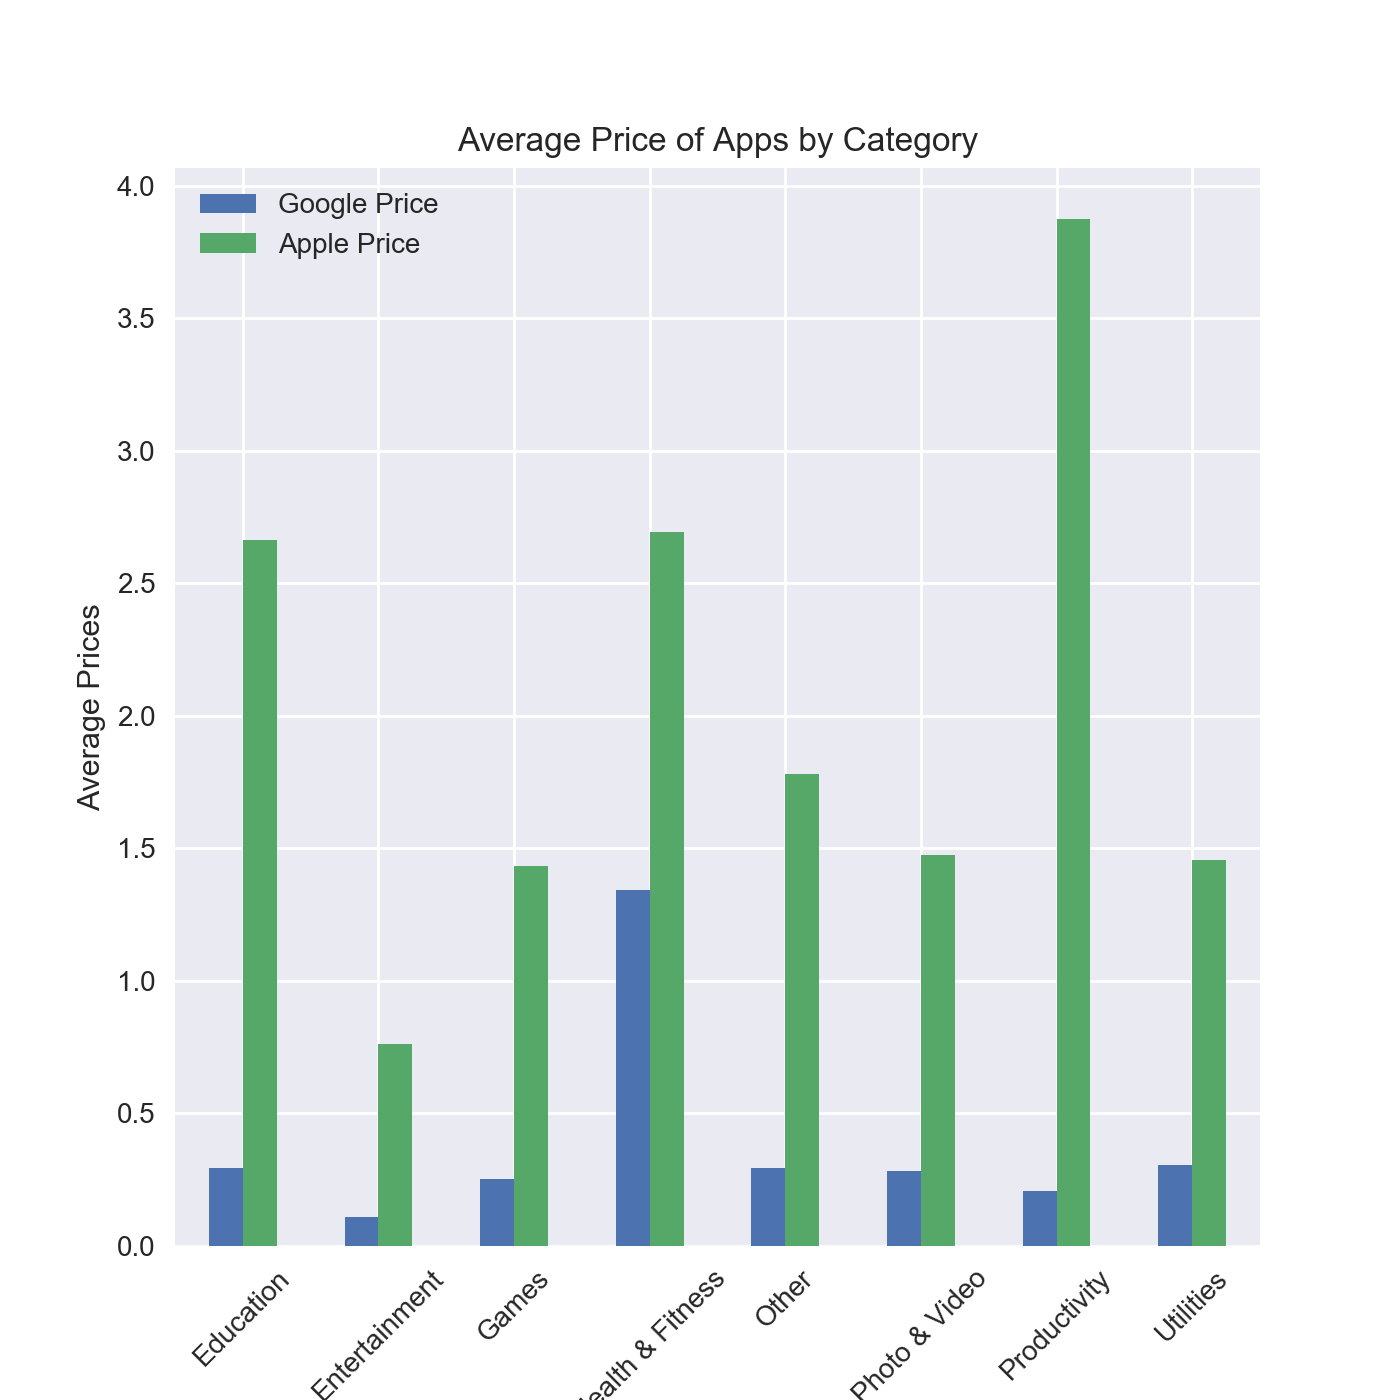

In [33]:
PBC =Price_By_Cat.plot(kind="bar", figsize=(7,7))
PBC.set_xticklabels(Price_By_Cat["New Genres"], rotation=45)
plt.title("Average Price of Apps by Category")
plt.ylabel("Average Prices")
plt.xlabel("Categories")
plt.savefig("Average_Price_By_Cat")

In [34]:
plt.close()

In [35]:
y = [A_Free["Rating"].mean(), A_Paid["Rating"].mean(), G_Free["Rating"].mean(),G_Paid["Rating"].mean()]
y_clean = [round(i,2) for i in y]

<IPython.core.display.Javascript object>


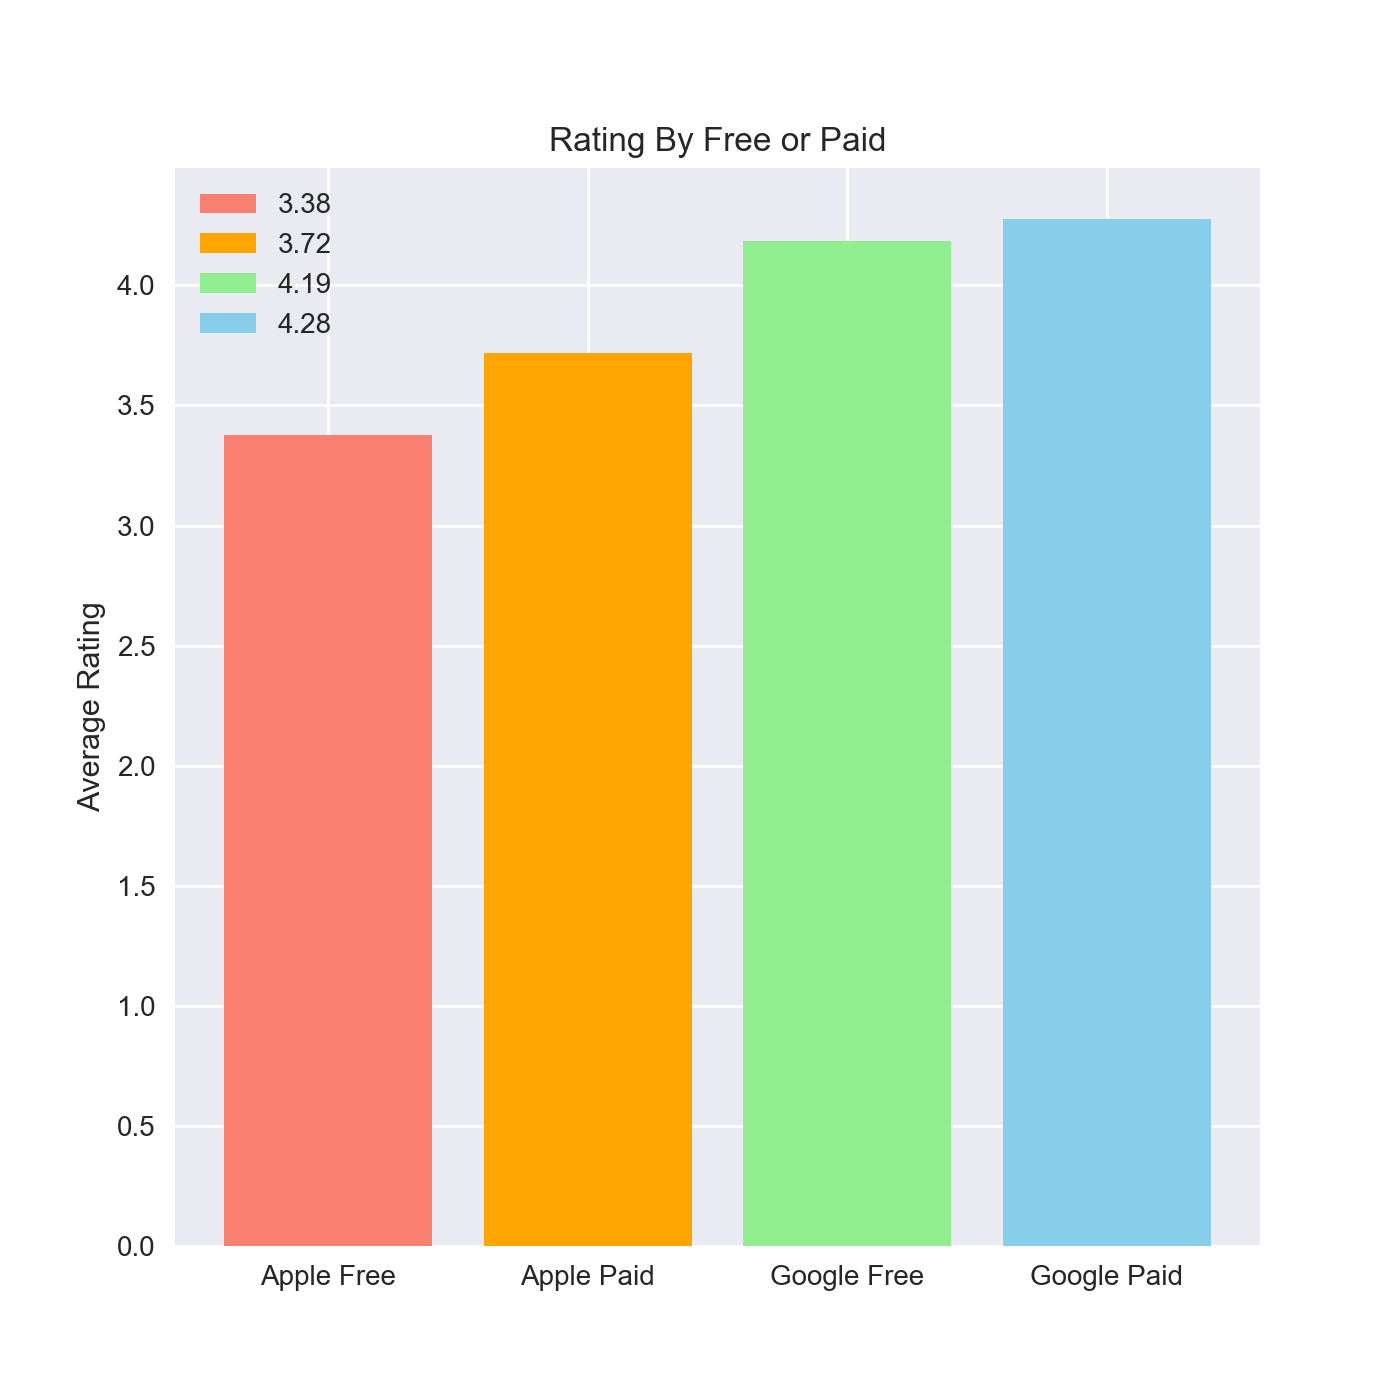

In [36]:
labels1 = ["Apple Free", "Apple Paid", "Google Free", "Google Paid"]
ind = np.arange(len(labels1))
fig, ax = plt.subplots(figsize=(7,7))
#ax.figure(figsize=(7,7))
A_Bar = ax.bar(0, A_Free["Rating"].mean(), label="Apple Free", color="salmon")
A_BarP = ax.bar(1, A_Paid["Rating"].mean(), label="Apple Paid", color="orange")
G_Bar = ax.bar(2, G_Free["Rating"].mean(), label="Google Free", color="lightgreen")
G_BarP = ax.bar(3, G_Paid["Rating"].mean(), label="Google Paid", color="skyblue")
ax.set_xticks(ind)
ax.set_xticklabels(labels1, rotation="horizontal")
ax.set_ylabel("Average Rating")
ax.set_title("Rating By Free or Paid")
ax.legend(y_clean)
plt.savefig("Rating_By_Free_or_Paid.png")

In [37]:
plt.close()